# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

In [1]:
import numpy as np

np.random.seed(123)

# generate N points per class
N = 500


# generate points
X1_1 = np.random.normal(loc = -1, scale =  0.5, size = N)
X1_2 = np.random.normal(loc = 2.5, scale = 1, size = N)
X1_3 = np.random.normal(loc = 4, scale = 1, size = N)

X2_1 = np.random.exponential(scale = 3, size = N)
X2_2 = np.random.lognormal(mean = 0.5, sigma = 0.5, size = N)
X2_3 = np.random.poisson(lam = 2, size = N) + 5


# For each set of points, we need the labels
y1 = np.ones(N) # 100 labels equal to one
y2 = np.ones(N) * 2 # 100 labels equal to 2
y3 = np.ones(N) * 3 # equal to 3

## Plot the points

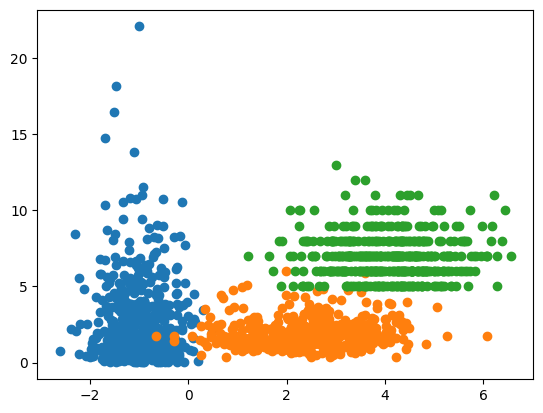

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.scatter(X1_3, X2_3)

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [3]:
# stack vectors
X = np.stack((np.ones(N * 3),
              np.concatenate((X1_1, X1_2, X1_3)), 
              np.concatenate((X2_1, X2_2, X2_3))), 
             axis = 1) # axis = 0, vector stacked horizontally

# creates labels vector
y = np.concatenate((y1, y2, y3)) # wants a tuple of vectors, (a, b, c)


## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [4]:
# choose label 2 to be the 'right' one, the positive one
positive_class = 2

# vecotr of 300 '-1'
y_class = - np.ones(y.shape[0])

# masking approach to make positive just the labels 2
# y == positive_class will output 200 False and 100 True
# y_class[y == positive_class] access the elements of y_class where y == positive_class is true
# add assignment to make them 1s
y_class [y == positive_class] = 1

In such a way we transformed a multi-class classification problem into a binary problem. With this approach, it is very easy to generate some _unbalanced classes_. A problem is called __balanced__ when the proportion of positive and negative labels is pretty much the same. When we transform the problem into a binary one, it is almost certain that the problem will be unbalanced. In this case $\frac{1}{3}$ of the classes are positive and $\frac{2}{3}$ are negative. But what if we had 100 or 1000 classes and just one of them is the right one: the problem would be even more disproportionate. A more realistic problem is when we type a very niche query into a search engine: the right classes (websites) are a ten while the wrong ones are the whole web, billions. In the case the problem is rightly detecting the classes more than labelling the wrong ones.

### Plot this binary problem

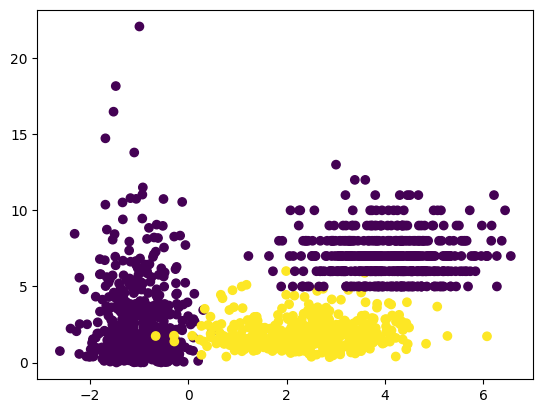

In [5]:
plt.scatter(X[:, 1], X[:, 2], c = y_class)

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [6]:
def sse(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w)))
    return error

## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

# of errors =  126.0


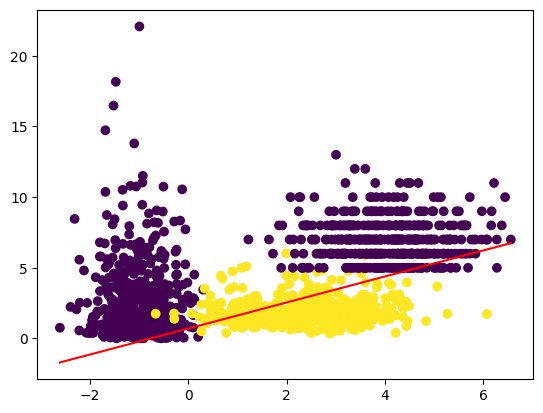

In [7]:
# generate w_0,....,w_n
w = np.random.uniform(low = -1, high = 1, size = 3)

# plot inizial weight vector
#plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]])

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c = y_class)

# set learning rate 0 < eta <= 1
eta = 1e-5

# set mini batch size
batch_size = 10

# set max epochs
max_epochs = 3000

# track total error per epoch
sse_epoch = np.zeros(max_epochs + 1)

# set checkpoint
errors_epoch = np.zeros(max_epochs + 1)

for epochs in range(max_epochs):
    
    # compute error
    sse_epoch[epochs] = sse(X, y, w)

    # take the sign because it is a perceptron
    errors_epoch[epochs] = sum(np.sign(np.dot(X, w)) == -1)
    
    # generate random permutation
    rand_perm = np.random.permutation(range(y_class.shape[0]))
    X = X[rand_perm, :]
    y_class = y_class[rand_perm]
    
    # mini-batch learning
    for j in range(0, y_class.shape[0], batch_size):
        
        X_batch = X[j : (j + batch_size), :]
        
        y_batch = y_class[j : (j + batch_size)]
        
        errors = y_batch - np.dot(X_batch, w)

        # update rule
        w = w + eta * np.dot(np.transpose(X_batch), errors)    

sse_epoch[epochs + 1] = sse(X, y_class, w)
errors_epoch[epochs + 1] = sum((y_class * np.sign(np.dot(X, w))) < 0)

#print(eta)
print("# of errors = ", errors_epoch[-1])
plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], 
         [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]],
        c = "red")

## Plot number of errors per epoch

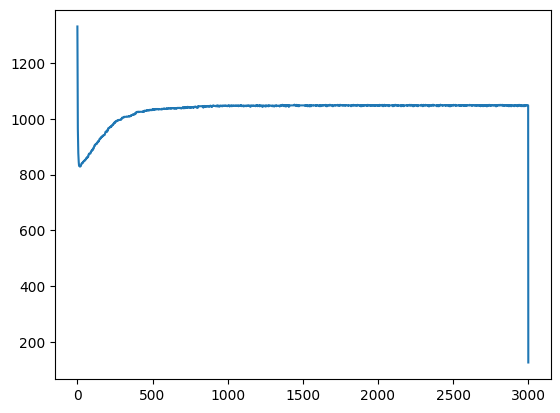

In [8]:
plt.plot(range(max_epochs + 1), errors_epoch)

# Polynomial regression task

In this exercise, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some random noise with a Gaussian distribution (mean zero, standard deviation 2.5).



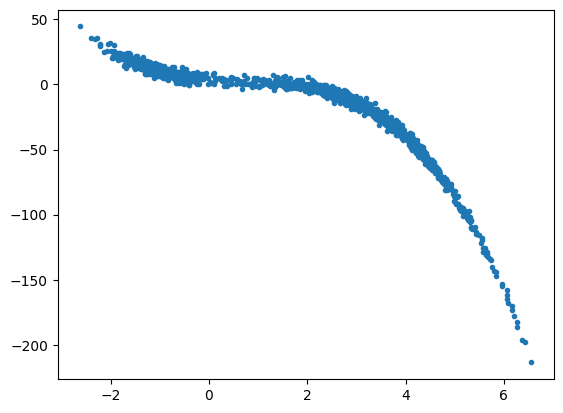

In [9]:
# generate (oracle) quadratic target function
a = -1
b = 2
c = -3
d = 4

sigma = 2.5
noise = np.random.randn(3 * N) * sigma

X1 = np.concatenate((X1_1, X1_2, X1_3)) #  create X1

y = (a * X1**3) + (b * X1**2) + (c * X1) + d + noise

# plot data
plt.plot(X1, y, '.')


## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [10]:
X0 = np.ones(N * 3)

# create (quadratic) data matrix
X_reg_quadratic = np.stack((X0, X1, X1**2), axis = 1)
X_reg_cubic = np.stack((X0, X1, X1**2, X1**3), axis=1)
X_reg_quartc = np.stack((X0, X1, X1**2, X1**3, X1**4), axis=1)

## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

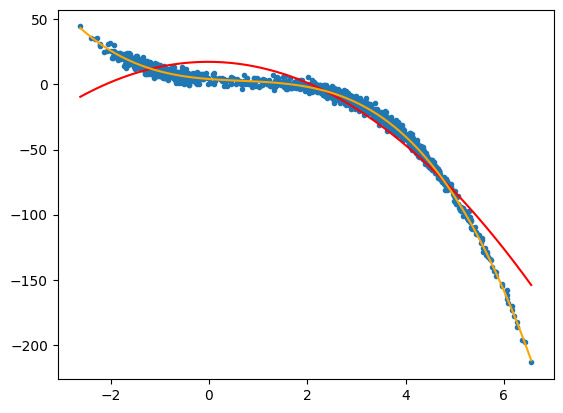

In [11]:
# find closed form solution: w = (X^T  X)^-1 (X^T y)
w_quadratic = np.dot(
        np.linalg.inv(
            np.dot(
                np.transpose(X_reg_quadratic),
                X_reg_quadratic)
            ),

        np.dot(
            np.transpose(X_reg_quadratic),
            y
        )
    )

w_cubic = np.dot(np.linalg.inv(np.dot(np.transpose(X_reg_cubic), X_reg_cubic)), np.dot(np.transpose(X_reg_cubic), y))
w_quartic = np.dot(np.linalg.inv(np.dot(np.transpose(X_reg_quartc), X_reg_quartc)), np.dot(np.transpose(X_reg_quartc), y))



# plot points
plt.plot(X1, y, '.')

# generate grid of points
x_grid = np.linspace(np.min(X1), np.max(X1), 100)

# plot line
plt.plot(x_grid, w_quadratic[0] +
         x_grid * w_quadratic[1] +
         x_grid**2 * w_quadratic[2],
         'red')

plt.plot(x_grid, w_cubic[0] +
         x_grid * w_cubic[1] +
         x_grid**2 * w_cubic[2] +
         x_grid**3 * w_cubic[3],
         'orange')

# plt.plot(x_grid, w_quartic[0] +
#          x_grid * w_quartic[1] +
#          x_grid**2 * w_quartic[2] +
#          x_grid**3 * w_quartic[3] +
#          x_grid**4 * w_quartic[4],
#          'green')


## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

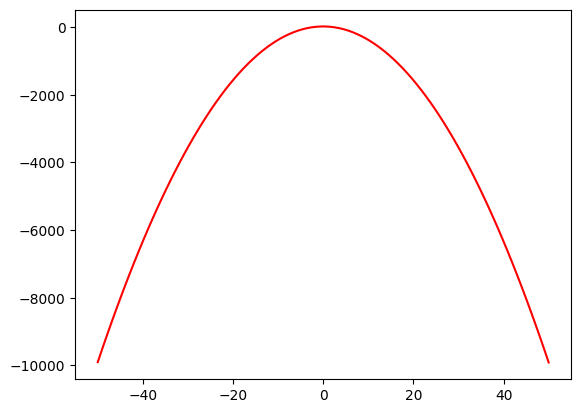

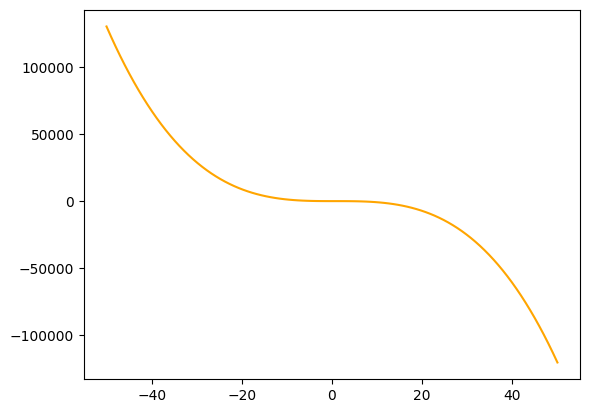

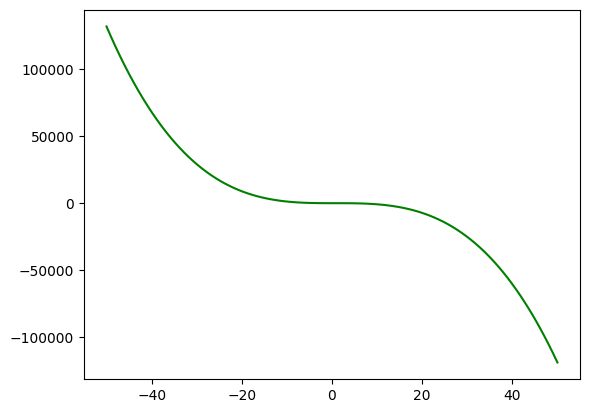

In [12]:
x_grid = np.linspace(-50, 50, 100)

plt.figure()
plt.plot(x_grid, w_quadratic[0] +
         x_grid * w_quadratic[1] +
         x_grid**2 * w_quadratic[2],
         'red')

plt.figure()
plt.plot(x_grid, w_cubic[0] +
         x_grid * w_cubic[1] +
         x_grid**2 * w_cubic[2] +
         x_grid**3 * w_cubic[3],
         'orange')

plt.figure()
plt.plot(x_grid, w_quartic[0] +
         x_grid * w_quartic[1] +
         x_grid**2 * w_quartic[2] +
         x_grid**3 * w_quartic[3] +
         x_grid**4 * w_quartic[4],
         'green')